# Jupyter Data Science Workflow

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

from ds_workflow.data import get_fremont_data 

In [2]:
data = get_fremont_data()
data.head()

,Total,East,West
Date,,,
2012-10-03 12:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


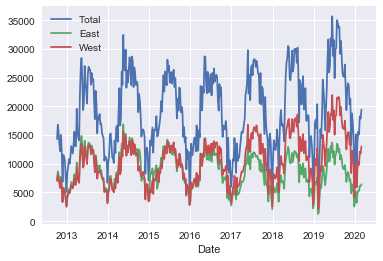

In [3]:
data.resample('W').sum().plot()

(0, 1248385.3)

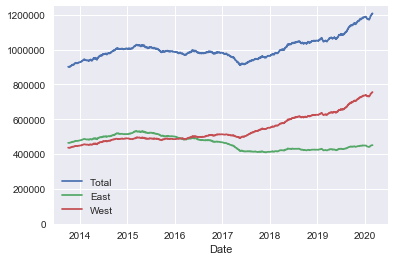

In [4]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

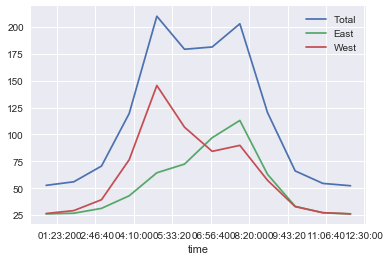

In [5]:
data.groupby(data.index.time).mean().plot()

In [6]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
01:00:00,50.0,64.5,60.0,96.0,122.5
02:00:00,65.0,64.0,66.0,106.0,122.0
03:00:00,84.5,75.0,84.0,107.0,118.5
04:00:00,161.0,141.5,159.5,94.0,114.0
05:00:00,307.0,266.5,229.5,92.5,100.0


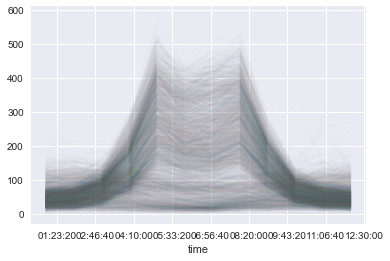

In [7]:
pivoted.plot(legend=False, alpha=0.01)

In [8]:
X = pivoted.fillna(0).T.values
X.shape

(2706, 12)

In [9]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(2706, 2)

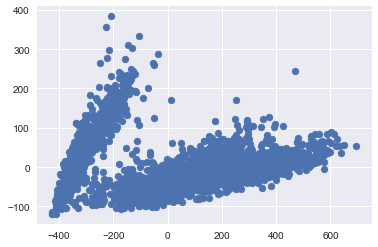

In [10]:
plt.scatter(X2[:, 0], X2[:, 1])

In [11]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

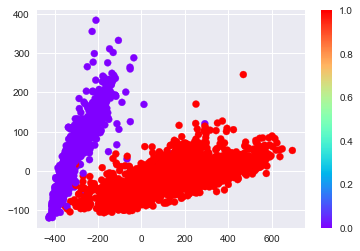

In [12]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

Text(0.5,1,'Red Cluster')

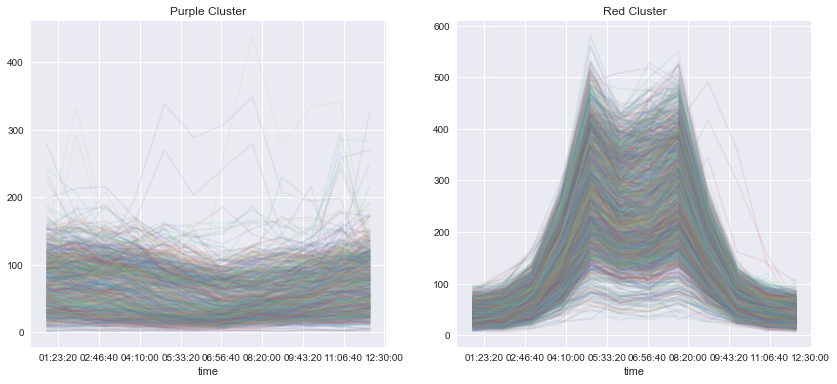

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

pivoted.T[labels==0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

In [14]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

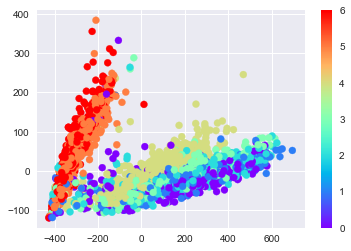

In [15]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

In [16]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28'],
              dtype='datetime64[ns]', length=1854, freq=None)